<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Скользящее-среднее" data-toc-modified-id="Скользящее-среднее-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Скользящее среднее</a></span></li><li><span><a href="#Тренд-и-сезонность" data-toc-modified-id="Тренд-и-сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тренд и сезонность</a></span></li><li><span><a href="#Проверим-на-стационарность" data-toc-modified-id="Проверим-на-стационарность-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверим на стационарность</a></span></li><li><span><a href="#Разности-временного-ряда" data-toc-modified-id="Разности-временного-ряда-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Разности временного ряда</a></span></li><li><span><a href="#Итог" data-toc-modified-id="Итог-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Итог</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Предсказание-константой" data-toc-modified-id="Предсказание-константой-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предсказание константой</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#ElasticNet" data-toc-modified-id="ElasticNet-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ElasticNet</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>ARIMA</a></span><ul class="toc-item"><li><span><a href="#Параметры-d,-p,-q" data-toc-modified-id="Параметры-d,-p,-q-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Параметры d, p, q</a></span></li><li><span><a href="#Поиск-наилучших-параметров" data-toc-modified-id="Поиск-наилучших-параметров-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Поиск наилучших параметров</a></span></li><li><span><a href="#Предсказание" data-toc-modified-id="Предсказание-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Предсказание</a></span></li></ul></li><li><span><a href="#Итог" data-toc-modified-id="Итог-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Итог</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси
# Задачи
Разработка системы предсказания объема заказа.
# Описание
Компания такси собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Строится модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

## Подготовка

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import lightgbm as lgb
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
data.isna().sum()

num_orders    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
data.sort_index(inplace=True)

In [6]:
data.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


## Анализ

In [7]:
data = data.resample('1h').sum()

In [10]:
data.index.is_monotonic

True

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>  

Хорошее начало проекта!👍
       
- Молодец, что провела сглаживание данных по одному часу (ресемплирование)  
- Здорово, что провела сортировку индексов. Если сомневаешься, то можно до сортировки проверить в хронологическом ли порядке расположены значения индекса. Использовать: `index.is_monotonic`
    
</div>

### Скользящее среднее

Text(0.5, 1.0, 'Rolling mean')

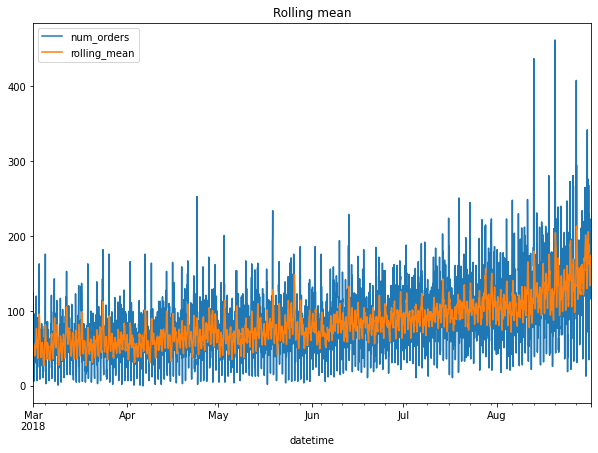

In [11]:
data['rolling_mean'] = data.rolling(10).mean()
data.plot(figsize=(10,7))
plt.title('Rolling mean')

### Тренд и сезонность

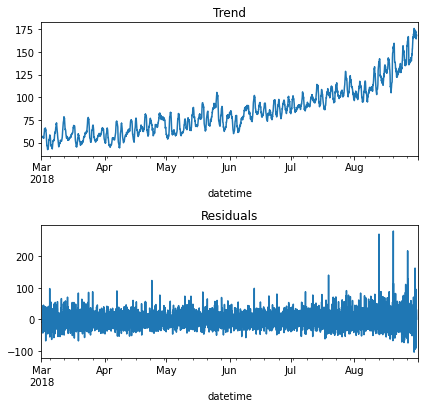

In [13]:

decomposed = seasonal_decompose(data['num_orders'])

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Text(0.5, 1.0, 'Seasonality')

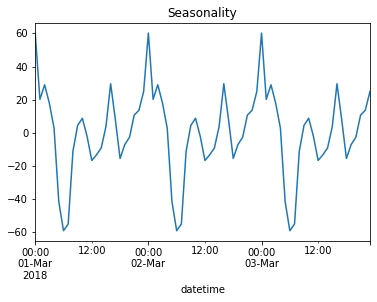

In [21]:
decomposed.seasonal['2018-03-01':'2018-03-03'].plot()
plt.title('Seasonality')

### Проверим на стационарность

In [17]:
d = 0
ts = data['num_orders']

# function "adfuller()" returns a tuple containing these values. The most interesting for us is the "p_value"
test_statistic, p_value, usedlag, nobs, critical_values, icbest = adfuller(ts, regression='ctt')
print("d = {}. Stationarity test p_value: {}".format(d, p_value))
if p_value < 0.05:
    print('Ряд стационарный')
else:
    print('Ряд не является стационарным, переходим к следующему значению d')

d = 0. Stationarity test p_value: 4.0549397892403547e-17
Ряд стационарный


### Разности временного ряда

Text(0.5, 1.0, 'time series difference')

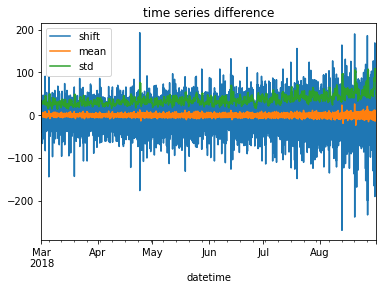

In [18]:
data['shift'] = data['num_orders'] - data['num_orders'].shift()
data['mean'] = data['shift'].rolling(15).mean()
data['std'] = data['shift'].rolling(15).std()
data['shift'].plot()
data['mean'].plot()
data['std'].plot()
plt.legend()
plt.title('time series difference')

### Итог
Из анализа графиков можем сказать, что есть небольшой тренд на увеличение количества заказов с марта по сентябрь. Также можем заметить определенную периодичность количества заказов такси в течение суток. То есть есть пиковые часы загрузки утром, в обеденное время и ближе к 12 часам ночи. Также  с помощью теста  Дики-Фуллера определили, наш временной ряд стационарный в широком смысле, хотя и на графике тренда можем заметить увеличение продаж.

## Обучение

In [22]:
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

make_features(data, 24, 1)
data.head()

,num_orders,rolling_mean,shift,mean,std,hour,dayofweek,lag_1,lag_2,lag_3,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,124.0,-39.0,NaN,NaN,1,3,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,85.0,-14.0,NaN,NaN,2,3,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,71.0,-5.0,NaN,NaN,3,3,71.0,85.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,66.0,-23.0,NaN,NaN,4,3,66.0,71.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data = data.drop(['mean', 'std'], axis=1)

In [24]:
data = data.dropna()

In [28]:
train, test = train_test_split(data, test_size = 0.1, shuffle = False)

In [29]:
train_target = train['num_orders']
test_target = test['num_orders']
train_feauters = train.drop('num_orders', axis=1)
test_feauters = test.drop('num_orders', axis=1)

### Предсказание константой

In [101]:
pred_median = np.ones(test.shape) * train['num_orders'].median()
print("RMSE:",mean_squared_error(pred_median, test)**0.5)

RMSE: 544.7040899544605


### LinearRegression

In [31]:
model = LinearRegression()
RMSE_lr = cross_val_score(model, train_feauters, train_target, cv=TimeSeriesSplit(n_splits=2), scoring='neg_root_mean_squared_error')
RMSE_lr = abs(RMSE_lr.mean())
RMSE_lr

6.53837969299183e-14

### ElasticNet

In [32]:
parametersGrid = {
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

m_en = ElasticNet()
model_en = GridSearchCV(m_en, parametersGrid, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=2))
model_en.fit(train_feauters, train_target)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 985.5518045662366, tolerance: 121.21904036418817
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1971.2918244124116, tolerance: 293.60264910815937
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9603.634249248627, tolerance: 121.21904036418817
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_root_mean_squared_error')

In [33]:
model_en.best_estimator_

ElasticNet(alpha=0.001)

In [34]:
rmse_en = abs(model_en.best_score_)
rmse_en

0.002112734710732463

### LightGBM

In [73]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.3],
    'n_estimators': [50, 100],
    'max_depth': [3, 6, 12]
}
estimator = lgb.LGBMRegressor(objective='regression')

model_lgbm = RandomizedSearchCV(estimator=estimator, 
                     param_distributions=param_grid,
                     cv=TimeSeriesSplit(n_splits=2), 
                     n_jobs=-1, 
                     scoring='neg_root_mean_squared_error')

model_lgbm.fit(train_feauters, train_target)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
                   estimator=LGBMRegressor(objective='regression'), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.3],
                                        'max_depth': [3, 6, 12],
                                        'n_estimators': [50, 100]},
                   scoring='neg_root_mean_squared_error')

In [74]:
model_lgbm

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None),
                   estimator=LGBMRegressor(objective='regression'), n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.3],
                                        'max_depth': [3, 6, 12],
                                        'n_estimators': [50, 100]},
                   scoring='neg_root_mean_squared_error')

In [75]:
model_lgbm.best_estimator_

LGBMRegressor(learning_rate=0.3, max_depth=3, objective='regression')

In [77]:
model_lgbm.best_params_

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.3}

In [76]:
rmse_lgbm = abs(model_lgbm.best_score_)
rmse_lgbm

8.406679760368434

### ARIMA

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

#### Параметры d, p, q
Определим параметры d, p ,q модели ARIMA. Отметим, что параметр d мы определилии ранее, и получили, что при d = 0 - ряд стационарен. Тогда наша модель сводиться к модели ARMA.

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


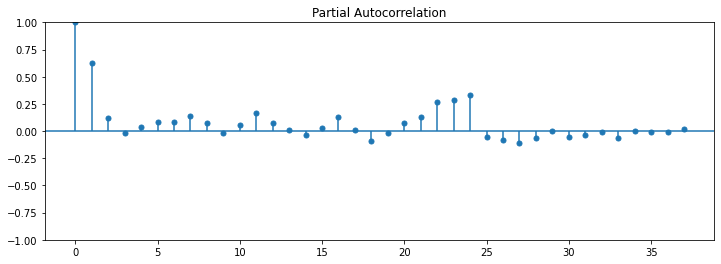

In [39]:
plot_pacf(ts, alpha=None).set_size_inches(12, 4)
plt.show()

In [43]:
ts_without_season = decomposed.trend + decomposed.resid

In [48]:
ts_without_season.index.is_monotonic

True

In [49]:
ts_without_season.isna().sum()

24

In [52]:
ts_without_season.head(13)

datetime
2018-03-01 00:00:00          NaN
2018-03-01 01:00:00          NaN
2018-03-01 02:00:00          NaN
2018-03-01 03:00:00          NaN
2018-03-01 04:00:00          NaN
2018-03-01 05:00:00          NaN
2018-03-01 06:00:00          NaN
2018-03-01 07:00:00          NaN
2018-03-01 08:00:00          NaN
2018-03-01 09:00:00          NaN
2018-03-01 10:00:00          NaN
2018-03-01 11:00:00          NaN
2018-03-01 12:00:00    46.721606
Freq: H, dtype: float64

In [53]:
ts_without_season.tail(13)

datetime
2018-08-31 11:00:00    169.133377
2018-08-31 12:00:00           NaN
2018-08-31 13:00:00           NaN
2018-08-31 14:00:00           NaN
2018-08-31 15:00:00           NaN
2018-08-31 16:00:00           NaN
2018-08-31 17:00:00           NaN
2018-08-31 18:00:00           NaN
2018-08-31 19:00:00           NaN
2018-08-31 20:00:00           NaN
2018-08-31 21:00:00           NaN
2018-08-31 22:00:00           NaN
2018-08-31 23:00:00           NaN
Freq: H, dtype: float64

In [54]:
ts_without_season.bfill(inplace=True)

In [55]:
ts_without_season.dropna(inplace=True)

In [56]:
ts_without_season.isna().sum()

0

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


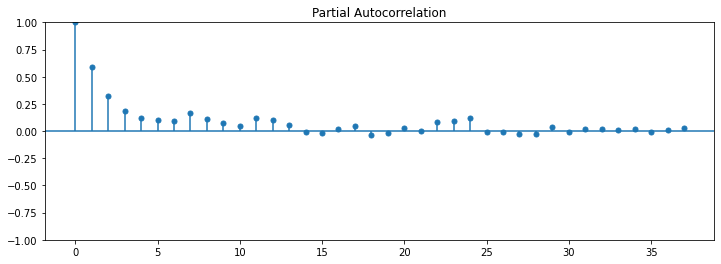

In [57]:
plot_pacf(ts_without_season, alpha=None).set_size_inches(12, 4)
plt.show()

Исходя из графиков, можем предположить что p=2.
Теперь найдем параметр q

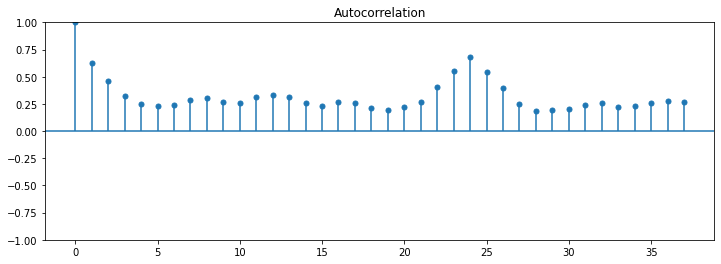

In [58]:
plot_acf(ts, alpha=None).set_size_inches(12, 4)
plt.show()

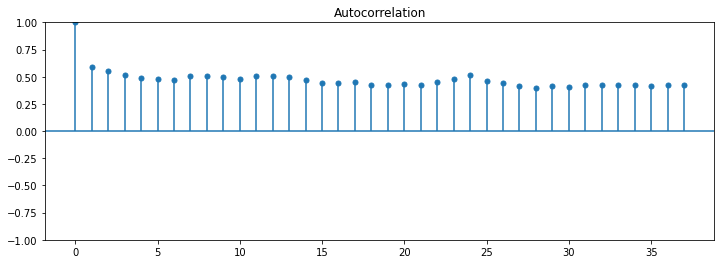

In [59]:
plot_acf(ts_without_season, alpha=None).set_size_inches(12, 4)
plt.show()

Большое количество значений подходит для параметра q, возьмем q  = 8.

Таким образом, получаем следующее значение параметров: d = 0, p =1, 1 < q < 8. 


#### Поиск наилучших параметров

In [61]:
# ARIMA(1, 0, 1)
model_min = ARIMA(ts, order=(1,0,1)).fit()
print(model_min.summary())

                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                 4416
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -21955.864
Date:                Fri, 31 Mar 2023   AIC                          43919.728
Time:                        13:39:09   BIC                          43945.300
Sample:                    03-01-2018   HQIC                         43928.747
                         - 08-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.4295      1.861     45.372      0.000      80.782      88.077
ar.L1          0.7386      0.013     58.157      0.000       0.714       0.763
ma.L1         -0.1888      0.018    -10.219      0.0

In [63]:
# ARIMA(1, 0, 10)
model_max = ARIMA(ts, order=(1,0,8)).fit()
print(model_max.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             num_orders   No. Observations:                 4416
Model:                 ARIMA(1, 0, 8)   Log Likelihood              -21685.169
Date:                Fri, 31 Mar 2023   AIC                          43392.338
Time:                        13:42:43   BIC                          43462.661
Sample:                    03-01-2018   HQIC                         43417.141
                         - 08-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.7667     76.264      1.111      0.266     -64.709     234.242
ar.L1          0.9999      0.000   4109.488      0.000       0.999       1.000
ma.L1         -0.5529      0.012    -47.885      0.0

In [64]:
%%capture
# List of parameter tuples (p, d, q)
params_list = [(1, 0, q) for q in range(8)]

# Dictionary of {parameter tuple : fitted model}
models_dict = {params: ARIMA(ts, order=params).fit() for params in params_list}

best_llf = max(models_dict.items(), key=lambda x: x[1].llf)[0]
best_aic = min(models_dict.items(), key=lambda x: x[1].aic)[0]

In [65]:
print("Best Log Likelihood: ARIMA{}".format(best_llf))
models_dict[best_llf].summary()

Best Log Likelihood: ARIMA(1, 0, 7)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             num_orders   No. Observations:                 4416
Model:                 ARIMA(1, 0, 7)   Log Likelihood              -21692.745
Date:                Fri, 31 Mar 2023   AIC                          43405.490
Time:                        13:54:07   BIC                          43469.420
Sample:                    03-01-2018   HQIC                         43428.038
                         - 08-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.7306     61.986      1.367      0.172     -36.759     206.220
ar.L1          0.9999      0.000   3461.369      0.000       0.999       1.000
ma.L1         -0.5724      0.012    -49.725      0.000      -0.595      -0.550
ma.L2         -0.1291      0.013     -9.811      0.000      -0.155      -0.103
ma.L3         -0.1937      0.015    -12.573      0.000      -0.224      -0.164
ma.L4         -0.1455      0.016     -9.327      0.000      -0.176      -0.115
ma.L5         -0.0694      0.016     -4.284      0.000      -0.101      -0.038
ma.L6         -0.0368      0.016     -2.265      0.024      -0.069      -0.005
ma.L7          0.1639      0.014     11.734      0.000       0.136       0.191
sigma2      1078.7952     15.560     69.329      0.000    1048.297    1109.293
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              2512.76
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
print("Best AIC: ARIMA{}".format(best_aic))
models_dict[best_aic].summary()

Best AIC: ARIMA(1, 0, 7)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             num_orders   No. Observations:                 4416
Model:                 ARIMA(1, 0, 7)   Log Likelihood              -21692.745
Date:                Fri, 31 Mar 2023   AIC                          43405.490
Time:                        13:54:42   BIC                          43469.420
Sample:                    03-01-2018   HQIC                         43428.038
                         - 08-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.7306     61.986      1.367      0.172     -36.759     206.220
ar.L1          0.9999      0.000   3461.369      0.000       0.999       1.000
ma.L1         -0.5724      0.012    -49.725      0.000      -0.595      -0.550
ma.L2         -0.1291      0.013     -9.811      0.000      -0.155      -0.103
ma.L3         -0.1937      0.015    -12.573      0.000      -0.224      -0.164
ma.L4         -0.1455      0.016     -9.327      0.000      -0.176      -0.115
ma.L5         -0.0694      0.016     -4.284      0.000      -0.101      -0.038
ma.L6         -0.0368      0.016     -2.265      0.024      -0.069      -0.005
ma.L7          0.1639      0.014     11.734      0.000       0.136       0.191
sigma2      1078.7952     15.560     69.329      0.000    1048.297    1109.293
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              2512.76
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Перебором значений q от 0 до 8, получаем, что наилучшие параметры для модели такие: b =0, p=1, q = 7.

#### Предсказание

In [67]:
best_model_ARIMA = models_dict[best_aic]

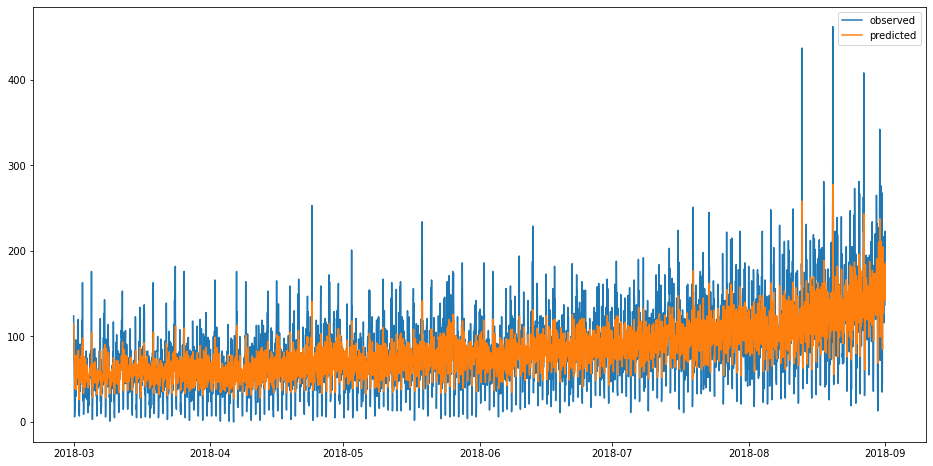

In [69]:
arima_prediction = best_model_ARIMA.predict(start=1)
plt.figure(figsize=(16,8))
plt.plot(ts, color='tab:blue', label='observed')
plt.plot(arima_prediction, color='tab:orange', label='predicted')
plt.legend()
plt.show()

In [72]:
mean_squared_error(ts[1:], arima_prediction)**0.5

32.89078925985695

### Итог
В разделе предсказания временного ряда было исследовано несколько моделей. Для модели линейной регрессии значение метрики RMSE = 6.53e-14. 

Для модели линейной регрессси с l1 и l2 регуляризацией (Elastic Net) с параметром alpha=0.001, RMSE = 0.0021. 

Для модели LightGBM лучшими параметрами оказались 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.3. RMSE модели LightGBM = 8.4. 

Для модели ARIMA лучшие параметры такие:  b =0, p=1, q = 7. А значение RMSE = 32.89.

При самом просто случае - предсказании константой (медианой, если быть точным) получили значение RMSE: 544.70. 

Таким образом, получаем, что значение метрики всех моделей по сравнению с константной моделью меньше, а значит предсказания адекватны.

Также в данном проекте важно найти модель с качество RMSE не больше 48 часов. И наилучшее значение метрики у модели линейной регрессии.

## Тестирование

In [80]:
model.fit(train_feauters, train_target)
prediction = model.predict(test_feauters)
print("RMSE тестовой выборки: ", mean_squared_error(prediction, test_target)**0.5)

RMSE тестовой выборки:  7.977337351934745e-14


In [86]:

prediction = pd.Series(prediction, index=test_target.index)

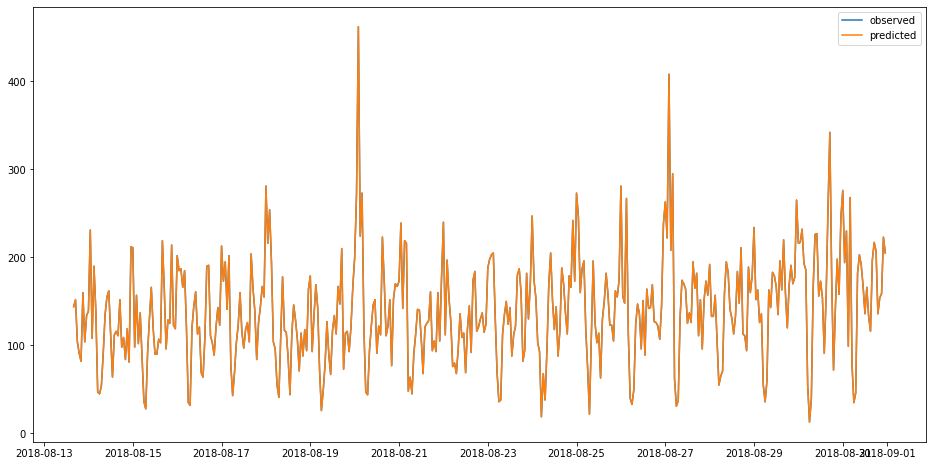

In [89]:
plt.figure(figsize=(16,8))
plt.plot(test_target,  label='observed')
plt.plot(prediction,  label='predicted')
plt.legend()
plt.show()

Получаем очень точное сходство на тестовой выборке для модели линейной регрессии

## Вывод

В работе были проделаны следующие шаги: анализ данных, обучение моделей и выбор наилучшей модели, тестирование наилучшей модели на тестовой выборке.

На этапе анализа данных были построены графики тренда, сезонности и шума, а также график для среднего и стандартного отклонения разностей временного ряда. Из анализа графиков можем сказать, что есть небольшой тренд на увеличение количества заказов с марта по сентябрь. Также можем заметить определенную периодичность количества заказов такси в течение суток. То есть есть пиковые часы загрузки утром, в обеденное время и ближе к 12 часам ночи. Также с помощью теста Дики-Фуллера определили, наш временной ряд стационарный в широком смысле, хотя и на графике тренда можем заметить увеличение продаж.

На этапе обучения моделей было исследовано несколько моделей. Для модели линейной регрессии значение метрики RMSE = 6.53e-14. 
Для модели линейной регрессси с l1 и l2 регуляризацией (Elastic Net) с параметром alpha=0.001, RMSE = 0.0021. 
Для модели LightGBM лучшими параметрами оказались 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.3. RMSE модели LightGBM = 8.4. Для модели ARIMA лучшие параметры такие:  b =0, p=1, q = 7. А значение RMSE = 32.89.
При самом простом случае - предсказании константой (медианой, если быть точным) получили значение RMSE: 544.70. 

Таким образом, получаем, что значение метрики всех моделей по сравнению с константной моделью меньше, а значит предсказания адекватны. Также в данном проекте важно найти модель с качество RMSE не больше 48 часов. И наилучшее значение метрики у модели линейной регрессии.

На этапе тестирования метрика качества RMSE для наилучшей модели (моделии инейной регрессии) равна 7.97e-14, и это является отличным результатом.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48